In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv(r'C:\Users\sanja\Downloads\Customers.csv')
products = pd.read_csv(r'C:\Users\sanja\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\sanja\Downloads\Transactions.csv')

In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


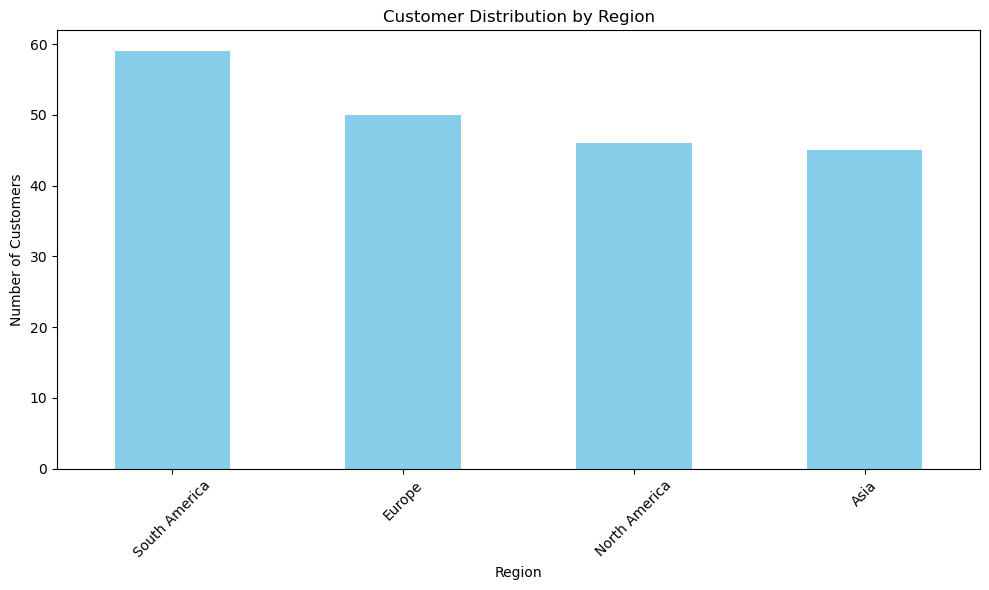

In [5]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Sanjay_Kumar_EDA_Region_Distribution.png')
plt.show()

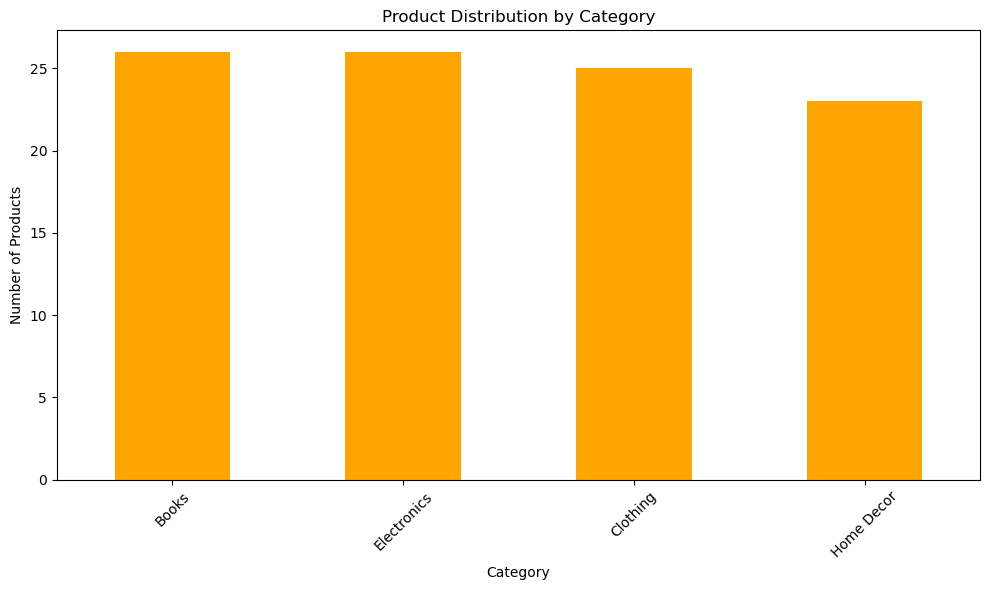

In [6]:
category_counts = products['Category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='orange')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Sanjay_Kumar_EDA_Product_Category.png')
plt.show()

In [7]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()

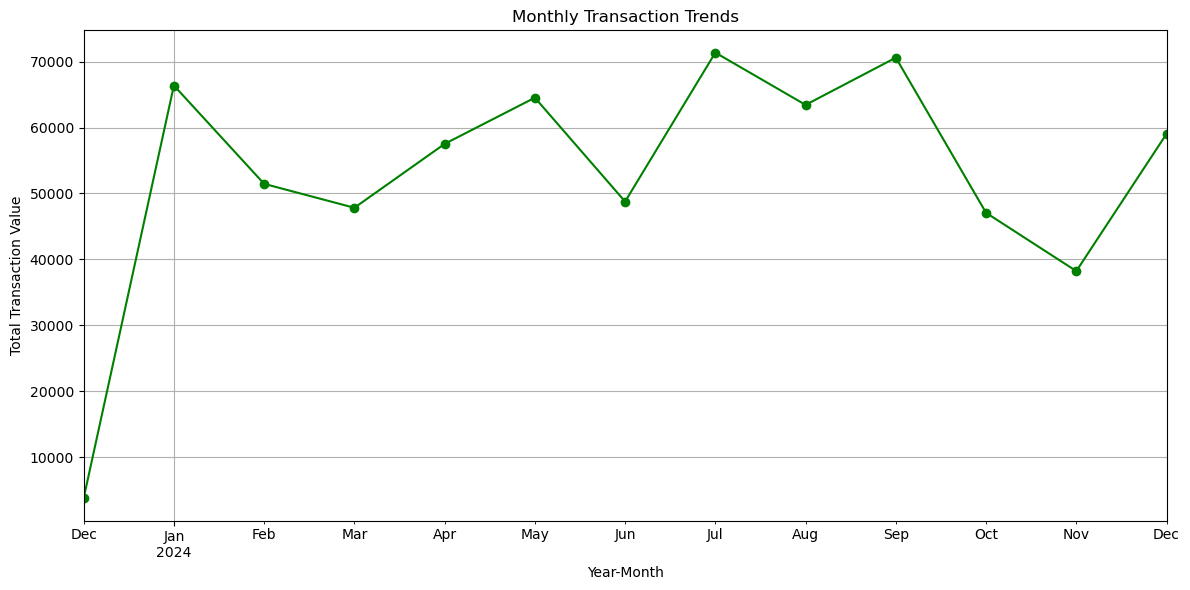

In [8]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Transaction Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Transaction Value')
plt.grid(True)
plt.tight_layout()
plt.savefig('Sanjay_Kumar_EDA_Monthly_Transactions.png')
plt.show()


In [9]:
eda_summary = pd.DataFrame({
    'Insight': [
        'Most customers are from regions with high population density.',
        'Certain product categories dominate sales, indicating customer preferences.',
        'Transactions peak during holiday seasons or promotions.',
        'A significant portion of customers have low transaction frequency, representing potential churn risk.',
        'High-value transactions are concentrated among a small group of customers.'
    ]
})
eda_summary.to_csv('Sanjay_Kumar_EDA_Summary.csv', index=False)